<a href="https://colab.research.google.com/github/MarioBolanos/AnalisisNumerico/blob/master/4_ConvexProgramming/Convex_Programming_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import numpy as np
import math
import matplotlib.pyplot as plt

#4.5.1 Wireless Communication Channel


Consider a wireless communication channel in Fig. 3.6 with transmit power $p_t$. The received power pr in decibel ($dB$) is derived using the model:

> $p_r = p_t + K − 10\gamma log_{10} d$

where K is a constant depending on the radio frequency and antennas gains, $\gamma$ is the path loss exponent, and $d$ in meters is the distance between the transmitter and the receiver. In a set of empirical measurements of $pr−pt$ in $dB$, given in Table 3.1, find constants $K$ and $\gamma$ to minimize the mean square error between the model and the empirical measurements.

Let’s define $M_{model} = p_r−p_t = K−10\gamma log_{10} d$ and $M_{measure} = p_r−p_t$ given in Table 3.1.
The mean square error is

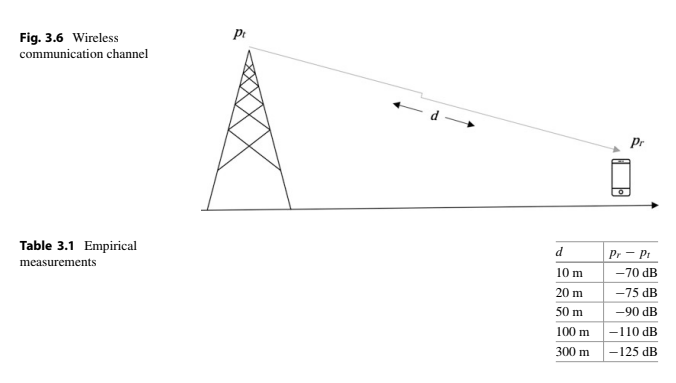

$b=Ax$

In [ ]:
A = np.array([[1 ,- 10*math.log10(10)], 
     [1 ,- 10*math.log10(20)],
     [1 ,- 10*math.log10(50)],
     [1 ,- 10*math.log10(100)],
     [1 ,- 10*math.log10(300)]])


In [ ]:
b = np.array([-70,-75,-90,-110,-125])

In [ ]:
# Define and solve the CVXPY problem.
x = cp.Variable(2)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("The optimal x is")
xopt = x.value
print(xopt)

The optimal x is
[-26.7439583    3.96691516]


$M_{model} = K−10\gamma log_{10} d$

In [ ]:
# Samples
d = np.array([10,20,50,100,300]) 


In [ ]:
# Fitted model
def f(x,K,l):
  return K-10*l*math.log10(x)  

N = 50
x = np.linspace(10,300,N)
y = np.zeros(N)
for i in range(N):
  y[i] = f(x[i],*xopt)

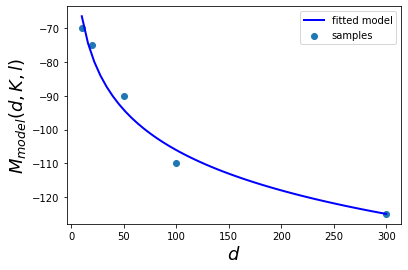

In [ ]:
# Plot samples and fitted model
fig, ax = plt.subplots()
ax.scatter(d, b, label='samples')
ax.plot(x, y, 'b', lw=2, label='fitted model')
ax.set_xlabel(r"$d$", fontsize=18)
ax.set_ylabel(r"$M_{model}(d,K,l)$", fontsize=18)
ax.legend()

#4.5.2 Joint Power and Bandwidth Allocation

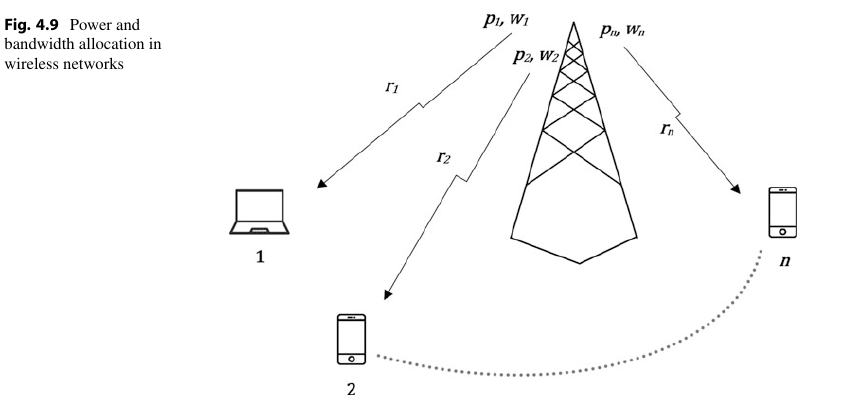

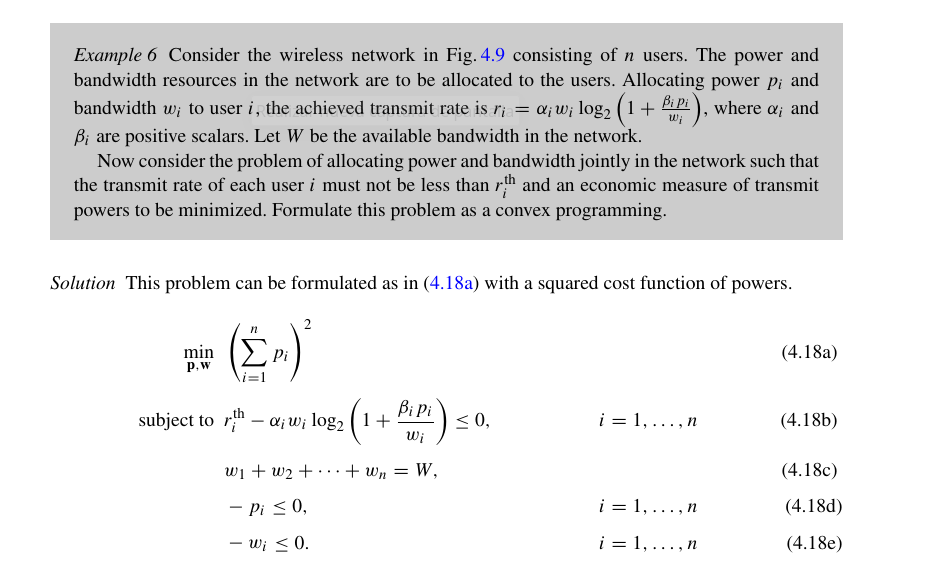

In [ ]:
# Constants
W = 1
rth = np.array([2, 1])
a= np.array([1, 1])
b = np.array([1, 0.5])

## Construct the problem
# definition of variables in cvxpy
p = cp.Variable(2)
w = cp.Variable(2)

# Objective function
objec = cp.Minimize(sum(p)**2)

# Constraints
const =  [rth[0]*cp.log(2) + a[0]*cp.kl_div(w[0],w[0]+b[0]*p[0]) - a[0]*b[0]*p[0] <= 0, 
          rth[1]*cp.log(2) + a[1]*cp.kl_div(w[1],w[1]+b[1]*p[1]) - a[1]*b[1]*p[1] <= 0,
          w >=0,
          p >=0,
          sum(w)==W]

# Problem
prob = cp.Problem(objec,const)

## Solve the problem
# The optimal objective value is returned by `prob.solve()`.
prob.solve()
print("\nThe optimal value is", prob.value)

# The optimal value for x is stored in `x.value`.
print("A solution p is")
print(p.value)
print("A solution w is")
print(w.value)


The optimal value is 83.35315477842217
A solution p is
[5.15674609 3.9730488 ]
A solution w is
[0.62189165 0.37810835]


#4.5.3

In [ ]:
m = 4;
SINR = np.array([ [15], [12], [9], [6] ]) 
noise_pow = 1e-9

H=np.zeros((m,m))

for i in range(m):
  for j in range(m):
    H[i,j] = np.exp(-abs(i-j))

d = np.diag(H)
p = cp.Variable((m,1))

prob = cp.Problem(cp.Minimize(sum(p)),
                  [SINR*(H-np.diag(d)).T@p  + SINR*noise_pow - d*p <= 0,
                   p >= 0
                  ])
prob.solve()
print("status:", prob.status)
print("\nThe optimal value is", prob.value)
print("A solution p is")
print(p.value)

status: optimal_inaccurate

The optimal value is 1.9983388098097472e-08
A solution p is
[[8.64501405e-09]
 [5.82952061e-10]
 [9.05976727e-11]
 [1.06648243e-08]]


#4.5.4

In [ ]:
d = np.array([[1],[2],[3]]) # demand
s = np.array([[3],[3],[3]]) # supply
n = 3;
b = np.ones((n,1));

x=cp.Variable((n,n))

prob = cp.Problem(cp.Minimize(sum(x[0,:])**2 + sum(x[1,:])**2),
                  [x.T@b == d,
                   x@b <= s,
                   x >= 0
                  ])
prob.solve()

print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)



The optimal value is 4.5
A solution x is
[[0.16666667 0.5        0.83333333]
 [0.16666667 0.5        0.83333333]
 [0.66666667 1.         1.33333333]]
